In [84]:
from utils import *
from scipy.signal import periodogram,decimate

eeg = get_eeg_by_fileindex(1)
metadata = read_metadata_by_fileindex(1)

In [85]:
eegdem = decimate(eeg, q=10)

In [86]:
S_epoch_idx = metadata[metadata['label']==0].index
S_spectra = []
P_epoch_idx = metadata[metadata['label']==1].index
P_spectra = []
W_epoch_idx = metadata[metadata['label']==2].index
W_spectra = []
for index in S_epoch_idx:
    start_samples = index*10*500
    f, Pxx = periodogram(eeg[start_samples:start_samples+5000], 500,scaling='spectrum')
    S_spectra.append(Pxx[:201])
for index in P_epoch_idx:
    start_samples = index*10*500
    f, Pxx = periodogram(eeg[start_samples:start_samples+5000], 500,scaling='spectrum')
    P_spectra.append(Pxx[:201])
for index in W_epoch_idx:
    start_samples = index*10*500
    f, Pxx = periodogram(eeg[start_samples:start_samples+5000], 500,scaling='spectrum')
    W_spectra.append(Pxx[:201])
S_spectra_dem = []
P_spectra_dem = []
W_spectra_dem = []
for index in S_epoch_idx:
    start_samples = index*10*50
    f, Pxx = periodogram(eegdem[start_samples:start_samples+500], 50,scaling='spectrum')
    S_spectra_dem.append(Pxx[:201])
for index in P_epoch_idx:
    start_samples = index*10*50
    f, Pxx = periodogram(eegdem[start_samples:start_samples+500], 50,scaling='spectrum')
    P_spectra_dem.append(Pxx[:201])
for index in W_epoch_idx:
    start_samples = index*10*50
    f, Pxx = periodogram(eegdem[start_samples:start_samples+500], 50,scaling='spectrum')
    W_spectra_dem.append(Pxx[:201])

[None]

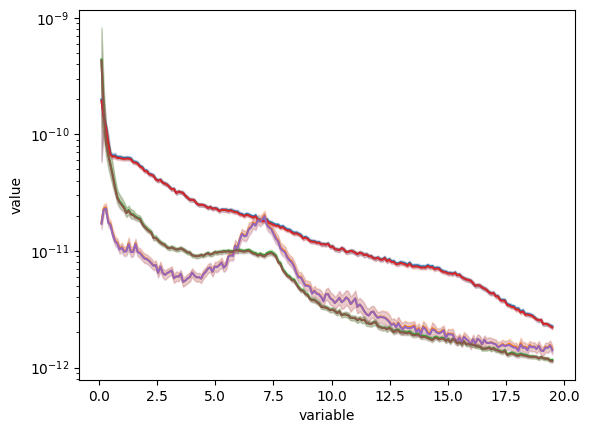

In [87]:
## PSD Before and After Decimation
import seaborn as sns
sns.lineplot(data=pd.DataFrame(S_spectra,columns=np.linspace(0,19.5,201)).iloc[:,1:].melt(),x='variable',y='value')
sns.lineplot(data=pd.DataFrame(P_spectra,columns=np.linspace(0,19.5,201)).iloc[:,1:].melt(),x='variable',y='value')
sns.lineplot(data=pd.DataFrame(W_spectra,columns=np.linspace(0,19.5,201)).iloc[:,1:].melt(),x='variable',y='value')
sns.lineplot(data=pd.DataFrame(S_spectra_dem,columns=np.linspace(0,19.5,201)).iloc[:,1:].melt(),x='variable',y='value')
sns.lineplot(data=pd.DataFrame(P_spectra_dem,columns=np.linspace(0,19.5,201)).iloc[:,1:].melt(),x='variable',y='value')
ax = sns.lineplot(data=pd.DataFrame(W_spectra_dem,columns=np.linspace(0,19.5,201)).iloc[:,1:].melt(),x='variable',y='value')
ax.set(yscale='log')

In [ ]:
## Compare to True PSD from Neuroscore
import seaborn as sns
sns.lineplot(data=pd.DataFrame(S_spectra,columns=np.linspace(0,19.5,201)).iloc[:,1:].melt(),x='variable',y='value')
sns.lineplot(data=pd.DataFrame(P_spectra,columns=np.linspace(0,19.5,201)).iloc[:,1:].melt(),x='variable',y='value')
ax = sns.lineplot(data=pd.DataFrame(W_spectra,columns=np.linspace(0,19.5,201)).iloc[:,1:].melt(),x='variable',y='value')
to_plot = pd.melt(metadata.iloc[:,1:-2],id_vars=['label'])
ax = sns.lineplot(data=to_plot,x='variable',y='value',hue='label',ci=99.99)
ax.set(yscale='log')